In [45]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('max_colwidth', 400)

### Extract the crowdfunding.xlsx Data

In [46]:
# Read the data into a Pandas DataFrame
crowdfunding_info_df = pd.read_excel('Resources/crowdfunding.xlsx')
crowdfunding_info_df.head()

,cf_id,contact_id,company_name,blurb,goal,pledged,outcome,backers_count,country,currency,launched_at,deadline,staff_pick,spotlight,category & sub-category
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100,0,failed,0,CA,CAD,1581573600,1614578400,False,False,food/food trucks
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400,14560,successful,158,US,USD,1611554400,1621918800,False,True,music/rock
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400,142523,successful,1425,AU,AUD,1608184800,1640844000,False,False,technology/web
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200,2477,failed,24,US,USD,1634792400,1642399200,False,False,music/rock
4,1365,2199,Larson-Little,Proactive foreground core,7600,5265,failed,53,US,USD,1608530400,1629694800,False,False,theater/plays


In [47]:
# Get a brief summary of the crowdfunding_info DataFrame.
crowdfunding_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   cf_id                    1000 non-null   int64 
 1   contact_id               1000 non-null   int64 
 2   company_name             1000 non-null   object
 3   blurb                    1000 non-null   object
 4   goal                     1000 non-null   int64 
 5   pledged                  1000 non-null   int64 
 6   outcome                  1000 non-null   object
 7   backers_count            1000 non-null   int64 
 8   country                  1000 non-null   object
 9   currency                 1000 non-null   object
 10  launched_at              1000 non-null   int64 
 11  deadline                 1000 non-null   int64 
 12  staff_pick               1000 non-null   bool  
 13  spotlight                1000 non-null   bool  
 14  category & sub-category  1000 non-null   

### Create the Category and Subcategory DataFrames
---
**Create a Category DataFrame that has the following columns:**
- A "category_id" column that is numbered sequential form 1 to the length of the number of unique categories.
- A "category" column that has only the categories.

Export the DataFrame as a `category.csv` CSV file.

**Create a SubCategory DataFrame that has the following columns:**
- A "subcategory_id" column that is numbered sequential form 1 to the length of the number of unique subcategories.
- A "subcategory" column that has only the subcategories. 

Export the DataFrame as a `subcategory.csv` CSV file.

In [48]:
# Get the crowdfunding_info_df columns.
crowdfunding_info_df.columns

Index(['cf_id', 'contact_id', 'company_name', 'blurb', 'goal', 'pledged',
       'outcome', 'backers_count', 'country', 'currency', 'launched_at',
       'deadline', 'staff_pick', 'spotlight', 'category & sub-category'],
      dtype='object')

In [49]:
# Assign the category and subcategory values to category and subcategory columns.
crowdfunding_info_df[['category', 'subcategory']] = crowdfunding_info_df['category & sub-category'].str.split('/', expand=True)
crowdfunding_info_df.head()

,cf_id,contact_id,company_name,blurb,goal,pledged,outcome,backers_count,country,currency,launched_at,deadline,staff_pick,spotlight,category & sub-category,category,subcategory
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100,0,failed,0,CA,CAD,1581573600,1614578400,False,False,food/food trucks,food,food trucks
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400,14560,successful,158,US,USD,1611554400,1621918800,False,True,music/rock,music,rock
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400,142523,successful,1425,AU,AUD,1608184800,1640844000,False,False,technology/web,technology,web
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200,2477,failed,24,US,USD,1634792400,1642399200,False,False,music/rock,music,rock
4,1365,2199,Larson-Little,Proactive foreground core,7600,5265,failed,53,US,USD,1608530400,1629694800,False,False,theater/plays,theater,plays


In [50]:
# Get the unique categories and subcategories in separate lists.
categories = crowdfunding_info_df['category'].unique().tolist()
subcategories = crowdfunding_info_df['subcategory'].unique().tolist()

print(categories)
print(subcategories)

['food', 'music', 'technology', 'theater', 'film & video', 'publishing', 'games', 'photography', 'journalism']
['food trucks', 'rock', 'web', 'plays', 'documentary', 'electric music', 'drama', 'indie rock', 'wearables', 'nonfiction', 'animation', 'video games', 'shorts', 'fiction', 'photography books', 'radio & podcasts', 'metal', 'jazz', 'translations', 'television', 'mobile games', 'world music', 'science fiction', 'audio']


In [51]:
# Get the number of distinct values in the categories and subcategories lists.
print(len(categories))
print(len(subcategories))

9
24


In [52]:
# Create numpy arrays from 1-9 for the categories and 1-24 for the subcategories.
category_ids = np.arange(1, 10)
subcategory_ids = np.arange(1, 25)

print(category_ids)
print(subcategory_ids)

[1 2 3 4 5 6 7 8 9]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


In [53]:
# Use a list comprehension to add "cat" to each category_id. 
cat_ids = [f"cat{category_id}" for category_id in category_ids]
# Use a list comprehension to add "subcat" to each subcategory_id.    
scat_ids = [f"scat{subcategory_id}" for subcategory_id in subcategory_ids]
    
print(cat_ids)
print(scat_ids)

['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9']
['scat1', 'scat2', 'scat3', 'scat4', 'scat5', 'scat6', 'scat7', 'scat8', 'scat9', 'scat10', 'scat11', 'scat12', 'scat13', 'scat14', 'scat15', 'scat16', 'scat17', 'scat18', 'scat19', 'scat20', 'scat21', 'scat22', 'scat23', 'scat24']


In [54]:
# Create a category DataFrame with the category_id array as the category_id and categories list as the category name.
category_df = pd.DataFrame({'category_id': cat_ids, 'category': categories})
# Create a category DataFrame with the subcategory_id array as the subcategory_id and subcategories list as the subcategory name. 
subcategory_df = pd.DataFrame({'subcategory_id': scat_ids, 'subcategory': subcategories})

In [55]:
category_df

,category_id,category
0,cat1,food
1,cat2,music
2,cat3,technology
3,cat4,theater
4,cat5,film & video
5,cat6,publishing
6,cat7,games
7,cat8,photography
8,cat9,journalism


In [56]:
subcategory_df

,subcategory_id,subcategory
0,scat1,food trucks
1,scat2,rock
2,scat3,web
3,scat4,plays
4,scat5,documentary
5,scat6,electric music
6,scat7,drama
7,scat8,indie rock
8,scat9,wearables
9,scat10,nonfiction


In [57]:
# Export categories_df and subcategories_df as CSV files.
category_df.to_csv("Resources/category.csv", index=False)

subcategory_df.to_csv("Resources/subcategory.csv", index=False)

### Campaign DataFrame
----
**Create a Campaign DataFrame that has the following columns:**
- The "cf_id" column.
- The "contact_id" column.
- The “company_name” column.
- The "blurb" column is renamed as "description."
- The "goal" column.
- The "goal" column is converted to a `float` datatype.
- The "pledged" column is converted to a `float` datatype. 
- The "backers_count" column. 
- The "country" column.
- The "currency" column.
- The "launched_at" column is renamed as "launch_date" and converted to a datetime format. 
- The "deadline" column is renamed as "end_date" and converted to a datetime format.
- The "category_id" with the unique number matching the “category_id” from the category DataFrame. 
- The "subcategory_id" with the unique number matching the “subcategory_id” from the subcategory DataFrame.
- And, create a column that contains the unique four-digit contact ID number from the `contact.xlsx` file.
 

Then export the DataFrame as a `campaign.csv` CSV file.


In [58]:
# Create a copy of the crowdfunding_info_df DataFrame name campaign_df. 
campaign_df = crowdfunding_info_df.copy()
campaign_df.head()

,cf_id,contact_id,company_name,blurb,goal,pledged,outcome,backers_count,country,currency,launched_at,deadline,staff_pick,spotlight,category & sub-category,category,subcategory
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100,0,failed,0,CA,CAD,1581573600,1614578400,False,False,food/food trucks,food,food trucks
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400,14560,successful,158,US,USD,1611554400,1621918800,False,True,music/rock,music,rock
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400,142523,successful,1425,AU,AUD,1608184800,1640844000,False,False,technology/web,technology,web
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200,2477,failed,24,US,USD,1634792400,1642399200,False,False,music/rock,music,rock
4,1365,2199,Larson-Little,Proactive foreground core,7600,5265,failed,53,US,USD,1608530400,1629694800,False,False,theater/plays,theater,plays


In [59]:
# Rename the blurb, launched_at, and deadline columns.
campaign_df = campaign_df.rename(columns={'blurb': 'description', 'launched_at': 'launch_date', 'deadline': 'end_date'})
campaign_df.head()

,cf_id,contact_id,company_name,description,goal,pledged,outcome,backers_count,country,currency,launch_date,end_date,staff_pick,spotlight,category & sub-category,category,subcategory
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100,0,failed,0,CA,CAD,1581573600,1614578400,False,False,food/food trucks,food,food trucks
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400,14560,successful,158,US,USD,1611554400,1621918800,False,True,music/rock,music,rock
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400,142523,successful,1425,AU,AUD,1608184800,1640844000,False,False,technology/web,technology,web
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200,2477,failed,24,US,USD,1634792400,1642399200,False,False,music/rock,music,rock
4,1365,2199,Larson-Little,Proactive foreground core,7600,5265,failed,53,US,USD,1608530400,1629694800,False,False,theater/plays,theater,plays


In [60]:
# Convert the goal and pledged columns to a `float` data type.
campaign_df['goal'] = campaign_df['goal'].astype(float)
campaign_df['pledged'] = campaign_df['pledged'].astype(float)
campaign_df.head()

,cf_id,contact_id,company_name,description,goal,pledged,outcome,backers_count,country,currency,launch_date,end_date,staff_pick,spotlight,category & sub-category,category,subcategory
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100.0,0.0,failed,0,CA,CAD,1581573600,1614578400,False,False,food/food trucks,food,food trucks
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400.0,14560.0,successful,158,US,USD,1611554400,1621918800,False,True,music/rock,music,rock
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400.0,142523.0,successful,1425,AU,AUD,1608184800,1640844000,False,False,technology/web,technology,web
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200.0,2477.0,failed,24,US,USD,1634792400,1642399200,False,False,music/rock,music,rock
4,1365,2199,Larson-Little,Proactive foreground core,7600.0,5265.0,failed,53,US,USD,1608530400,1629694800,False,False,theater/plays,theater,plays


In [61]:
# Check the datatypes
campaign_df.dtypes

cf_id                        int64
contact_id                   int64
company_name                object
description                 object
goal                       float64
pledged                    float64
outcome                     object
backers_count                int64
country                     object
currency                    object
launch_date                  int64
end_date                     int64
staff_pick                    bool
spotlight                     bool
category & sub-category     object
category                    object
subcategory                 object
dtype: object

In [62]:
# Format the launched_date and end_date columns to datetime format
from datetime import datetime as dt
campaign_df["launch_date"] = pd.to_datetime(campaign_df['launch_date'], unit='s').dt.strftime('%Y-%m-%d')
campaign_df["end_date"] = pd.to_datetime(campaign_df['end_date'], unit='s').dt.strftime('%Y-%m-%d')
campaign_df.head()

,cf_id,contact_id,company_name,description,goal,pledged,outcome,backers_count,country,currency,launch_date,end_date,staff_pick,spotlight,category & sub-category,category,subcategory
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100.0,0.0,failed,0,CA,CAD,2020-02-13,2021-03-01,False,False,food/food trucks,food,food trucks
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400.0,14560.0,successful,158,US,USD,2021-01-25,2021-05-25,False,True,music/rock,music,rock
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400.0,142523.0,successful,1425,AU,AUD,2020-12-17,2021-12-30,False,False,technology/web,technology,web
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200.0,2477.0,failed,24,US,USD,2021-10-21,2022-01-17,False,False,music/rock,music,rock
4,1365,2199,Larson-Little,Proactive foreground core,7600.0,5265.0,failed,53,US,USD,2020-12-21,2021-08-23,False,False,theater/plays,theater,plays


In [63]:
# Check the datatypes
campaign_df.dtypes

cf_id                        int64
contact_id                   int64
company_name                object
description                 object
goal                       float64
pledged                    float64
outcome                     object
backers_count                int64
country                     object
currency                    object
launch_date                 object
end_date                    object
staff_pick                    bool
spotlight                     bool
category & sub-category     object
category                    object
subcategory                 object
dtype: object

In [64]:
# Merge the campaign_df with the category_df on the "category" column and 
# the subcategory_df on the "subcategory" column.
campaign_merged_df_1 = pd.merge(campaign_df, category_df, on='category', how= 'left')
campaign_merged_df = pd.merge(campaign_merged_df_1, subcategory_df, on='subcategory', how= 'left')
campaign_merged_df.tail(10)


,cf_id,contact_id,company_name,description,goal,pledged,outcome,backers_count,country,currency,launch_date,end_date,staff_pick,spotlight,category & sub-category,category,subcategory,category_id,subcategory_id
990,1561,5500,Ortiz-Roberts,Devolved foreground customer loyalty,7800.0,6839.0,failed,64,US,USD,2021-06-09,2021-06-18,False,True,film & video/drama,film & video,drama,cat5,scat7
991,2632,3494,Ramirez LLC,Reduced reciprocal focus group,9800.0,11091.0,successful,241,US,USD,2020-12-09,2021-05-26,False,True,music/rock,music,rock,cat2,scat2
992,439,3924,Morrow Inc,Networked global migration,3100.0,13223.0,successful,132,US,USD,2020-06-14,2021-02-09,False,True,film & video/drama,film & video,drama,cat5,scat7
993,461,3521,Erickson-Rogers,De-engineered even-keeled definition,9800.0,7608.0,canceled,75,IT,EUR,2021-07-03,2021-07-08,False,True,photography/photography books,photography,photography books,cat8,scat15
994,1419,5262,"Leach, Rich and Price",Implemented bi-directional flexibility,141100.0,74073.0,failed,842,US,USD,2021-11-15,2021-12-07,False,True,publishing/translations,publishing,translations,cat6,scat19
995,2986,3684,Manning-Hamilton,Vision-oriented scalable definition,97300.0,153216.0,successful,2043,US,USD,2020-12-29,2021-05-30,False,True,food/food trucks,food,food trucks,cat1,scat1
996,2031,5784,Butler LLC,Future-proofed upward-trending migration,6600.0,4814.0,failed,112,US,USD,2021-10-15,2021-11-30,False,False,theater/plays,theater,plays,cat4,scat4
997,1627,1498,Ball LLC,Right-sized full-range throughput,7600.0,4603.0,canceled,139,IT,EUR,2021-11-06,2021-12-10,False,False,theater/plays,theater,plays,cat4,scat4
998,2175,6073,"Taylor, Santiago and Flores",Polarized composite customer loyalty,66600.0,37823.0,failed,374,US,USD,2020-10-08,2021-04-11,False,True,music/indie rock,music,indie rock,cat2,scat8
999,1788,4939,"Hernandez, Norton and Kelley",Expanded eco-centric policy,111100.0,62819.0,canceled,1122,US,USD,2020-12-30,2021-08-18,False,False,food/food trucks,food,food trucks,cat1,scat1


In [65]:
# Drop unwanted columns
campaign_cleaned = campaign_merged_df.drop(['staff_pick', 'spotlight', 'category & sub-category', 'category', 'subcategory'],axis=1)
campaign_cleaned.head(5)

,cf_id,contact_id,company_name,description,goal,pledged,outcome,backers_count,country,currency,launch_date,end_date,category_id,subcategory_id
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100.0,0.0,failed,0,CA,CAD,2020-02-13,2021-03-01,cat1,scat1
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400.0,14560.0,successful,158,US,USD,2021-01-25,2021-05-25,cat2,scat2
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400.0,142523.0,successful,1425,AU,AUD,2020-12-17,2021-12-30,cat3,scat3
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200.0,2477.0,failed,24,US,USD,2021-10-21,2022-01-17,cat2,scat2
4,1365,2199,Larson-Little,Proactive foreground core,7600.0,5265.0,failed,53,US,USD,2020-12-21,2021-08-23,cat4,scat4


In [66]:
# Export the DataFrame as a CSV file. 
campaign_cleaned.to_csv("Resources/campaign.csv", index=False)

### Extract the contacts.xlsx Data.

In [67]:
# Read the data into a Pandas DataFrame. Use the `header=2` parameter when reading in the data.
contact_info_df = pd.read_excel('Resources/contacts.xlsx', header=2)

print(contact_info_df.head())

                                                                                            
0                                                                               contact_info
1   {"contact_id": 4661, "name": "Cecilia Velasco", "email": "cecilia.velasco@rodrigues.fr"}
2          {"contact_id": 3765, "name": "Mariana Ellis", "email": "mariana.ellis@rossi.org"}
3            {"contact_id": 4187, "name": "Sofie Woods", "email": "sofie.woods@riviere.com"}
4  {"contact_id": 4941, "name": "Jeanette Iannotti", "email": "jeanette.iannotti@yahoo.com"}


### Create the Contacts DataFrame 
---
**Create a Contacts DataFrame that has the following columns:**
- A column named "contact_id"  that contains the unique number of the contact person.
- A column named "first_name" that contains the first name of the contact person.
- A column named "last_name" that contains the first name of the contact person.
- A column named "email" that contains the email address of the contact person

Then export the DataFrame as a `contacts.csv` CSV file.

### Option 1: Use Pandas to create the contacts DataFrame.

In [68]:
import json
# Check for empty strings or invalid JSON strings
def safe_json_loads(x):
    if pd.isna(x) or x.strip() == "":
        return None  # or return a default value
    try:
        return json.loads(x)
    except json.JSONDecodeError:
        print(f"Error decoding JSON: {x}")  # Print the problematic string
        return None  # or return a default value

# Convert the strings into dictionaries
contact_info_df['contact_info'] = contact_info_df.iloc[:, 0].apply(safe_json_loads)

# Drop rows where contact_info could not be decoded
contact_info_df = contact_info_df.dropna(subset=['contact_info'])

# Normalize the JSON data into a DataFrame
contact_info_normalized = pd.json_normalize(contact_info_df['contact_info'])

# Now you can split the 'name' column
contact_info_normalized[['first_name', 'last_name']] = contact_info_normalized['name'].str.split(' ', n=1, expand=True)

# # Create a new DataFrame with the desired columns
new_contact_info_df = contact_info_normalized[['contact_id', 'first_name', 'last_name', 'email']]

print(new_contact_info_df)



Error decoding JSON: contact_info
     contact_id    first_name   last_name  \
0          4661       Cecilia     Velasco   
1          3765       Mariana       Ellis   
2          4187         Sofie       Woods   
3          4941      Jeanette    Iannotti   
4          2199        Samuel     Sorgatz   
..          ...           ...         ...   
995        3684       Whitney       Noack   
996        5784     Gelsomina  Migliaccio   
997        1498   Evangelista     Pereira   
998        6073        Gareth     Comolli   
999        4939  Michelangelo        Hess   

                                         email  
0                 cecilia.velasco@rodrigues.fr  
1                      mariana.ellis@rossi.org  
2                      sofie.woods@riviere.com  
3                  jeanette.iannotti@yahoo.com  
4                     samuel.sorgatz@gmail.com  
..                                         ...  
995             whitney.noack@laboratorios.org  
996              gelsomina.miglia

In [69]:
# Check the datatypes.
contact_info_df.dtypes

                object
contact_info    object
dtype: object

In [70]:
# Create a "first"name" and "last_name" column with the first and last names from the "name" column. 
import json
# Check for empty strings or invalid JSON strings
def safe_json_loads(x):
    if pd.isna(x) or x.strip() == "":
        return None  # or return a default value
    try:
        return json.loads(x)
    except json.JSONDecodeError:
        print(f"Error decoding JSON: {x}")  # Print the problematic string
        return None  # or return a default value

# Convert the strings into dictionaries
contact_info_df['contact_info'] = contact_info_df.iloc[:, 0].apply(safe_json_loads)

# Drop rows where contact_info could not be decoded
contact_info_df = contact_info_df.dropna(subset=['contact_info'])

# Normalize the JSON data into a DataFrame
contact_info_normalized = pd.json_normalize(contact_info_df['contact_info'])

# Now you can split the 'name' column
contact_info_normalized[['first_name', 'last_name']] = contact_info_normalized['name'].str.split(' ', n=1, expand=True)

# Drop the contact_name column
contact_info_normalized = contact_info_normalized.drop(columns=['name'])
contact_info_normalized.head()


,contact_id,email,first_name,last_name
0,4661,cecilia.velasco@rodrigues.fr,Cecilia,Velasco
1,3765,mariana.ellis@rossi.org,Mariana,Ellis
2,4187,sofie.woods@riviere.com,Sofie,Woods
3,4941,jeanette.iannotti@yahoo.com,Jeanette,Iannotti
4,2199,samuel.sorgatz@gmail.com,Samuel,Sorgatz


In [71]:
# Reorder the columns
contact_info_normalized = contact_info_normalized[['contact_id', 'first_name', 'last_name', 'email']]
contact_info_normalized.head()

,contact_id,first_name,last_name,email
0,4661,Cecilia,Velasco,cecilia.velasco@rodrigues.fr
1,3765,Mariana,Ellis,mariana.ellis@rossi.org
2,4187,Sofie,Woods,sofie.woods@riviere.com
3,4941,Jeanette,Iannotti,jeanette.iannotti@yahoo.com
4,2199,Samuel,Sorgatz,samuel.sorgatz@gmail.com


In [72]:
# Check the datatypes one more time before exporting as CSV file.
contact_info_normalized.dtypes

contact_id     int64
first_name    object
last_name     object
email         object
dtype: object

In [73]:
# Export the DataFrame as a CSV file. 
contact_info_normalized.to_csv("Resources/contacts_pandas.csv", encoding='utf8', index=False)

### Option 2: Use regex to create the contacts DataFrame.

In [74]:
# Extract the four-digit contact ID number.
contact_info_df['contact_id'] = contact_info_df['contact_info'].astype(str).str.extract(r'(\d{4})')
contact_info_df

,,contact_info,contact_id
1,"{""contact_id"": 4661, ""name"": ""Cecilia Velasco"", ""email"": ""cecilia.velasco@rodrigues.fr""}","{'contact_id': 4661, 'name': 'Cecilia Velasco', 'email': 'cecilia.velasco@rodrigues.fr'}",4661
2,"{""contact_id"": 3765, ""name"": ""Mariana Ellis"", ""email"": ""mariana.ellis@rossi.org""}","{'contact_id': 3765, 'name': 'Mariana Ellis', 'email': 'mariana.ellis@rossi.org'}",3765
3,"{""contact_id"": 4187, ""name"": ""Sofie Woods"", ""email"": ""sofie.woods@riviere.com""}","{'contact_id': 4187, 'name': 'Sofie Woods', 'email': 'sofie.woods@riviere.com'}",4187
4,"{""contact_id"": 4941, ""name"": ""Jeanette Iannotti"", ""email"": ""jeanette.iannotti@yahoo.com""}","{'contact_id': 4941, 'name': 'Jeanette Iannotti', 'email': 'jeanette.iannotti@yahoo.com'}",4941
5,"{""contact_id"": 2199, ""name"": ""Samuel Sorgatz"", ""email"": ""samuel.sorgatz@gmail.com""}","{'contact_id': 2199, 'name': 'Samuel Sorgatz', 'email': 'samuel.sorgatz@gmail.com'}",2199
...,...,...,...
996,"{""contact_id"": 3684, ""name"": ""Whitney Noack"", ""email"": ""whitney.noack@laboratorios.org""}","{'contact_id': 3684, 'name': 'Whitney Noack', 'email': 'whitney.noack@laboratorios.org'}",3684
997,"{""contact_id"": 5784, ""name"": ""Gelsomina Migliaccio"", ""email"": ""gelsomina.migliaccio@junk.com""}","{'contact_id': 5784, 'name': 'Gelsomina Migliaccio', 'email': 'gelsomina.migliaccio@junk.com'}",5784
998,"{""contact_id"": 1498, ""name"": ""Evangelista Pereira"", ""email"": ""evangelista.pereira@thompson-peterson.biz""}","{'contact_id': 1498, 'name': 'Evangelista Pereira', 'email': 'evangelista.pereira@thompson-peterson.biz'}",1498
999,"{""contact_id"": 6073, ""name"": ""Gareth Comolli"", ""email"": ""gareth.comolli@tiscali.fr""}","{'contact_id': 6073, 'name': 'Gareth Comolli', 'email': 'gareth.comolli@tiscali.fr'}",6073


In [75]:
# Check the datatypes.
contact_info_df.dtypes

                object
contact_info    object
contact_id      object
dtype: object

In [76]:
# Extract the name of the contact and add it to a new column.

# Function to extract name from contact_info
def extract_name(contact_info):
    # Return the 'name' field
    return contact_info['name']

# Apply the function to the 'contact_info' column
contact_info_df['name'] = contact_info_df['contact_info'].apply(extract_name)
contact_info_df

,,contact_info,contact_id,name
1,"{""contact_id"": 4661, ""name"": ""Cecilia Velasco"", ""email"": ""cecilia.velasco@rodrigues.fr""}","{'contact_id': 4661, 'name': 'Cecilia Velasco', 'email': 'cecilia.velasco@rodrigues.fr'}",4661,Cecilia Velasco
2,"{""contact_id"": 3765, ""name"": ""Mariana Ellis"", ""email"": ""mariana.ellis@rossi.org""}","{'contact_id': 3765, 'name': 'Mariana Ellis', 'email': 'mariana.ellis@rossi.org'}",3765,Mariana Ellis
3,"{""contact_id"": 4187, ""name"": ""Sofie Woods"", ""email"": ""sofie.woods@riviere.com""}","{'contact_id': 4187, 'name': 'Sofie Woods', 'email': 'sofie.woods@riviere.com'}",4187,Sofie Woods
4,"{""contact_id"": 4941, ""name"": ""Jeanette Iannotti"", ""email"": ""jeanette.iannotti@yahoo.com""}","{'contact_id': 4941, 'name': 'Jeanette Iannotti', 'email': 'jeanette.iannotti@yahoo.com'}",4941,Jeanette Iannotti
5,"{""contact_id"": 2199, ""name"": ""Samuel Sorgatz"", ""email"": ""samuel.sorgatz@gmail.com""}","{'contact_id': 2199, 'name': 'Samuel Sorgatz', 'email': 'samuel.sorgatz@gmail.com'}",2199,Samuel Sorgatz
...,...,...,...,...
996,"{""contact_id"": 3684, ""name"": ""Whitney Noack"", ""email"": ""whitney.noack@laboratorios.org""}","{'contact_id': 3684, 'name': 'Whitney Noack', 'email': 'whitney.noack@laboratorios.org'}",3684,Whitney Noack
997,"{""contact_id"": 5784, ""name"": ""Gelsomina Migliaccio"", ""email"": ""gelsomina.migliaccio@junk.com""}","{'contact_id': 5784, 'name': 'Gelsomina Migliaccio', 'email': 'gelsomina.migliaccio@junk.com'}",5784,Gelsomina Migliaccio
998,"{""contact_id"": 1498, ""name"": ""Evangelista Pereira"", ""email"": ""evangelista.pereira@thompson-peterson.biz""}","{'contact_id': 1498, 'name': 'Evangelista Pereira', 'email': 'evangelista.pereira@thompson-peterson.biz'}",1498,Evangelista Pereira
999,"{""contact_id"": 6073, ""name"": ""Gareth Comolli"", ""email"": ""gareth.comolli@tiscali.fr""}","{'contact_id': 6073, 'name': 'Gareth Comolli', 'email': 'gareth.comolli@tiscali.fr'}",6073,Gareth Comolli


In [77]:
# Extract the email from the contacts and add the values to a new column.
# Function to extract email from contact_info
def extract_email(contact_info):
    # Return the 'name' field
    return contact_info['email']

# Apply the function to the 'contact_info' column
contact_info_df['email'] = contact_info_df['contact_info'].apply(extract_email)
contact_info_df

,,contact_info,contact_id,name,email
1,"{""contact_id"": 4661, ""name"": ""Cecilia Velasco"", ""email"": ""cecilia.velasco@rodrigues.fr""}","{'contact_id': 4661, 'name': 'Cecilia Velasco', 'email': 'cecilia.velasco@rodrigues.fr'}",4661,Cecilia Velasco,cecilia.velasco@rodrigues.fr
2,"{""contact_id"": 3765, ""name"": ""Mariana Ellis"", ""email"": ""mariana.ellis@rossi.org""}","{'contact_id': 3765, 'name': 'Mariana Ellis', 'email': 'mariana.ellis@rossi.org'}",3765,Mariana Ellis,mariana.ellis@rossi.org
3,"{""contact_id"": 4187, ""name"": ""Sofie Woods"", ""email"": ""sofie.woods@riviere.com""}","{'contact_id': 4187, 'name': 'Sofie Woods', 'email': 'sofie.woods@riviere.com'}",4187,Sofie Woods,sofie.woods@riviere.com
4,"{""contact_id"": 4941, ""name"": ""Jeanette Iannotti"", ""email"": ""jeanette.iannotti@yahoo.com""}","{'contact_id': 4941, 'name': 'Jeanette Iannotti', 'email': 'jeanette.iannotti@yahoo.com'}",4941,Jeanette Iannotti,jeanette.iannotti@yahoo.com
5,"{""contact_id"": 2199, ""name"": ""Samuel Sorgatz"", ""email"": ""samuel.sorgatz@gmail.com""}","{'contact_id': 2199, 'name': 'Samuel Sorgatz', 'email': 'samuel.sorgatz@gmail.com'}",2199,Samuel Sorgatz,samuel.sorgatz@gmail.com
...,...,...,...,...,...
996,"{""contact_id"": 3684, ""name"": ""Whitney Noack"", ""email"": ""whitney.noack@laboratorios.org""}","{'contact_id': 3684, 'name': 'Whitney Noack', 'email': 'whitney.noack@laboratorios.org'}",3684,Whitney Noack,whitney.noack@laboratorios.org
997,"{""contact_id"": 5784, ""name"": ""Gelsomina Migliaccio"", ""email"": ""gelsomina.migliaccio@junk.com""}","{'contact_id': 5784, 'name': 'Gelsomina Migliaccio', 'email': 'gelsomina.migliaccio@junk.com'}",5784,Gelsomina Migliaccio,gelsomina.migliaccio@junk.com
998,"{""contact_id"": 1498, ""name"": ""Evangelista Pereira"", ""email"": ""evangelista.pereira@thompson-peterson.biz""}","{'contact_id': 1498, 'name': 'Evangelista Pereira', 'email': 'evangelista.pereira@thompson-peterson.biz'}",1498,Evangelista Pereira,evangelista.pereira@thompson-peterson.biz
999,"{""contact_id"": 6073, ""name"": ""Gareth Comolli"", ""email"": ""gareth.comolli@tiscali.fr""}","{'contact_id': 6073, 'name': 'Gareth Comolli', 'email': 'gareth.comolli@tiscali.fr'}",6073,Gareth Comolli,gareth.comolli@tiscali.fr


In [78]:
# Create a copy of the contact_info_df with the 'contact_id', 'name', 'email' columns.
contact_info_df_cleaned = contact_info_df[['contact_id', 'name', 'email']]
contact_info_df_cleaned

,contact_id,name,email
1,4661,Cecilia Velasco,cecilia.velasco@rodrigues.fr
2,3765,Mariana Ellis,mariana.ellis@rossi.org
3,4187,Sofie Woods,sofie.woods@riviere.com
4,4941,Jeanette Iannotti,jeanette.iannotti@yahoo.com
5,2199,Samuel Sorgatz,samuel.sorgatz@gmail.com
...,...,...,...
996,3684,Whitney Noack,whitney.noack@laboratorios.org
997,5784,Gelsomina Migliaccio,gelsomina.migliaccio@junk.com
998,1498,Evangelista Pereira,evangelista.pereira@thompson-peterson.biz
999,6073,Gareth Comolli,gareth.comolli@tiscali.fr


In [79]:
# Create "first_name" and "last_name" columns with the first and last names from the "name" column. 
contact_info_df_cleaned[['first_name', 'last_name']] = contact_info_df_cleaned['name'].str.split(' ', n=1, expand=True)
contact_info_df_cleaned




/var/folders/7g/thp811pn5dbbwflfnhytf9kr0000gn/T/ipykernel_5173/21742424.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contact_info_df_cleaned[['first_name', 'last_name']] = contact_info_df_cleaned['name'].str.split(' ', n=1, expand=True)


,contact_id,name,email,first_name,last_name
1,4661,Cecilia Velasco,cecilia.velasco@rodrigues.fr,Cecilia,Velasco
2,3765,Mariana Ellis,mariana.ellis@rossi.org,Mariana,Ellis
3,4187,Sofie Woods,sofie.woods@riviere.com,Sofie,Woods
4,4941,Jeanette Iannotti,jeanette.iannotti@yahoo.com,Jeanette,Iannotti
5,2199,Samuel Sorgatz,samuel.sorgatz@gmail.com,Samuel,Sorgatz
...,...,...,...,...,...
996,3684,Whitney Noack,whitney.noack@laboratorios.org,Whitney,Noack
997,5784,Gelsomina Migliaccio,gelsomina.migliaccio@junk.com,Gelsomina,Migliaccio
998,1498,Evangelista Pereira,evangelista.pereira@thompson-peterson.biz,Evangelista,Pereira
999,6073,Gareth Comolli,gareth.comolli@tiscali.fr,Gareth,Comolli


In [80]:
# Drop the 'name' column
contact_info_firstandlast = contact_info_df_cleaned.drop(columns=['name'])
contact_info_firstandlast

,contact_id,email,first_name,last_name
1,4661,cecilia.velasco@rodrigues.fr,Cecilia,Velasco
2,3765,mariana.ellis@rossi.org,Mariana,Ellis
3,4187,sofie.woods@riviere.com,Sofie,Woods
4,4941,jeanette.iannotti@yahoo.com,Jeanette,Iannotti
5,2199,samuel.sorgatz@gmail.com,Samuel,Sorgatz
...,...,...,...,...
996,3684,whitney.noack@laboratorios.org,Whitney,Noack
997,5784,gelsomina.migliaccio@junk.com,Gelsomina,Migliaccio
998,1498,evangelista.pereira@thompson-peterson.biz,Evangelista,Pereira
999,6073,gareth.comolli@tiscali.fr,Gareth,Comolli


In [81]:
# Reorder the columns
contact_info_df_reordered = contact_info_firstandlast[['contact_id', 'first_name', 'last_name', 'email']]
contact_info_df_reordered

,contact_id,first_name,last_name,email
1,4661,Cecilia,Velasco,cecilia.velasco@rodrigues.fr
2,3765,Mariana,Ellis,mariana.ellis@rossi.org
3,4187,Sofie,Woods,sofie.woods@riviere.com
4,4941,Jeanette,Iannotti,jeanette.iannotti@yahoo.com
5,2199,Samuel,Sorgatz,samuel.sorgatz@gmail.com
...,...,...,...,...
996,3684,Whitney,Noack,whitney.noack@laboratorios.org
997,5784,Gelsomina,Migliaccio,gelsomina.migliaccio@junk.com
998,1498,Evangelista,Pereira,evangelista.pereira@thompson-peterson.biz
999,6073,Gareth,Comolli,gareth.comolli@tiscali.fr


In [82]:
# Check the datatypes one more time before exporting as CSV file.
contact_info_df_reordered.dtypes

contact_id    object
first_name    object
last_name     object
email         object
dtype: object

In [83]:
# Export the DataFrame as a CSV file. 
contact_info_df_reordered.to_csv("Resources/contacts_regex.csv", encoding='utf8', index=False)

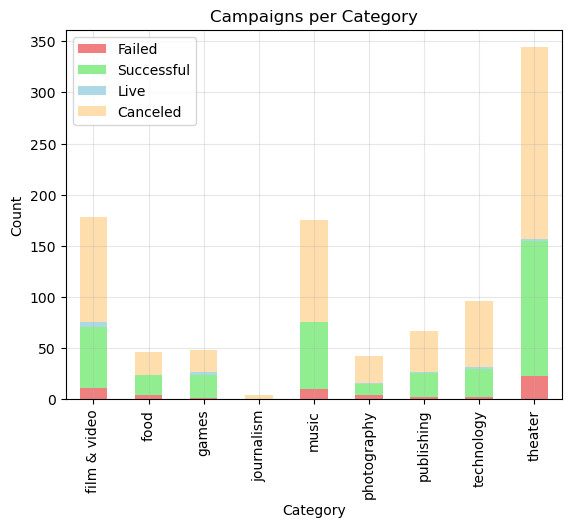

In [84]:
# Group the data by category and outcome, and count the occurrences
category_counts = campaign_df.groupby(['category', 'outcome']).size().unstack()

# Plot the bar graph
category_counts.plot(kind='bar', stacked=True, color=['lightcoral', 'lightgreen', 'lightblue', 'navajowhite'])

# Set the labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Campaigns per Category')
plt.grid(True, alpha=0.3)


# Show the legend
plt.legend(['Failed', 'Successful', 'Live', 'Canceled'])

# Save figure
plt.savefig('Resources/campaign_categories_bar_chart.png')

# Display the plot
plt.show()


<Figure size 1200x1200 with 0 Axes>

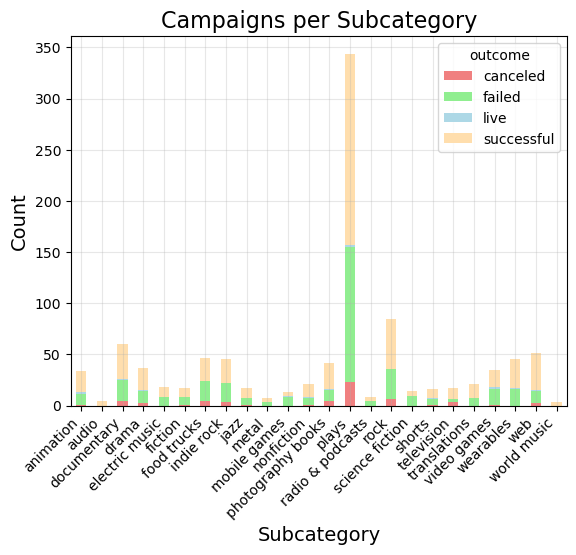

In [85]:
# Increase the size of the plot
plt.figure(figsize=(12, 12))

# Group the data by category and outcome, and count the occurrences
subcategory_counts = campaign_df.groupby(['subcategory', 'outcome']).size().unstack()

# Plot the bar graph
subcategory_counts.plot(kind='bar', stacked=True, color=['lightcoral', 'lightgreen', 'lightblue', 'navajowhite'])

# Set the labels and title
plt.xlabel('Subcategory', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Campaigns per Subcategory', fontsize=16)
plt.grid(True, alpha=0.3)

# Adjust the x-axis labels
plt.xticks(rotation=45, ha='right', fontsize=10)

# Save figure
plt.savefig('Resources/campaign_subcategories_bar_chart.png')

# Display the plot
plt.show()



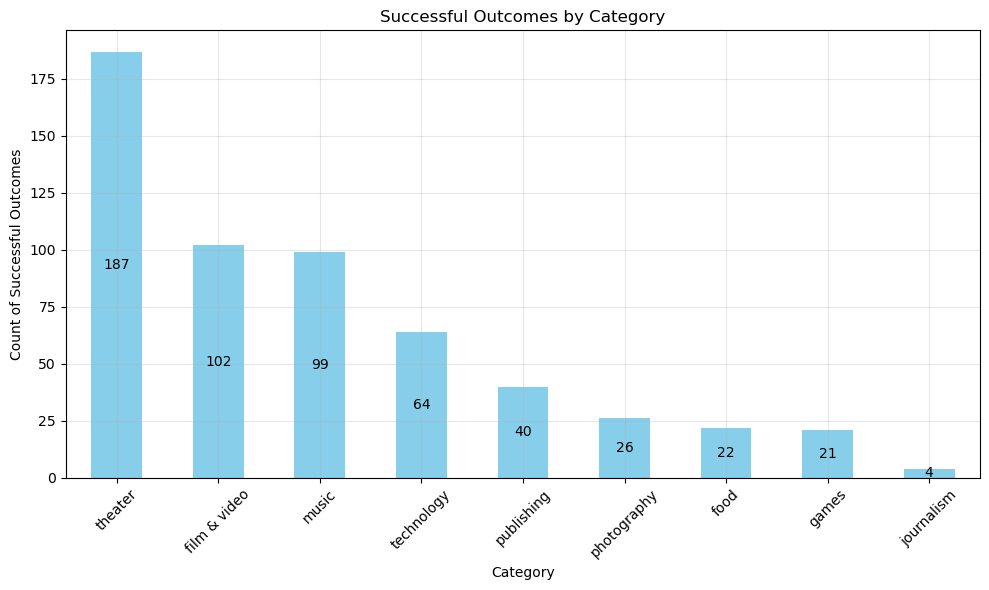

In [86]:
# Filter for successful outcomes
successful_outcomes = crowdfunding_info_df[crowdfunding_info_df['outcome'] == 'successful']
# Count successes per category
success_counts = successful_outcomes['category'].value_counts()

# Create a bar chart and assign it to ax
plt.figure(figsize=(10, 6))
ax = success_counts.plot(kind='bar', color='skyblue')

# Add value labels on top of each section of the bars for values greater than zero
for container in ax.containers:
    ax.bar_label(container, label_type='center', labels=[f"{h:.0f}" if h > 0 else "" for h in container.datavalues])  # Place the label in the center of each section

plt.title('Successful Outcomes by Category')
plt.xlabel('Category')
plt.ylabel('Count of Successful Outcomes')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Show the plot
plt.tight_layout()
plt.savefig("Resources/Successful_outcomes_by_category.png")
plt.show()


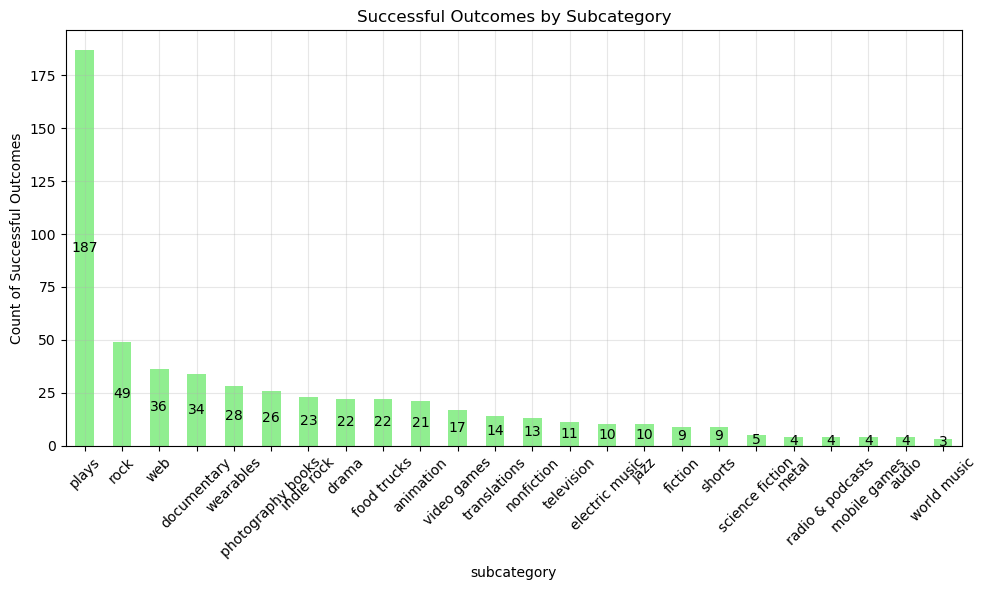

In [87]:
crowdfunding_info_df

# Filter for successful outcomes
successful_outcomes = crowdfunding_info_df[crowdfunding_info_df['outcome'] == 'successful']
# Count successes per category
success_counts = successful_outcomes['subcategory'].value_counts()


# Create a bar chart and assign it to ax
plt.figure(figsize=(10, 6))
ax = success_counts.plot(kind='bar', color='lightgreen')

# Add value labels on top of each section of the bars for values greater than zero
for container in ax.containers:
    ax.bar_label(container, label_type='center', labels=[f"{h:.0f}" if h > 0 else "" for h in container.datavalues])  # Place the label in the center of each section

plt.title('Successful Outcomes by Subcategory')
plt.xlabel('subcategory')
plt.ylabel('Count of Successful Outcomes')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Show the plot
plt.tight_layout()
plt.savefig("Resources/Successful_outcomes_by_subcategory.png")
plt.show()


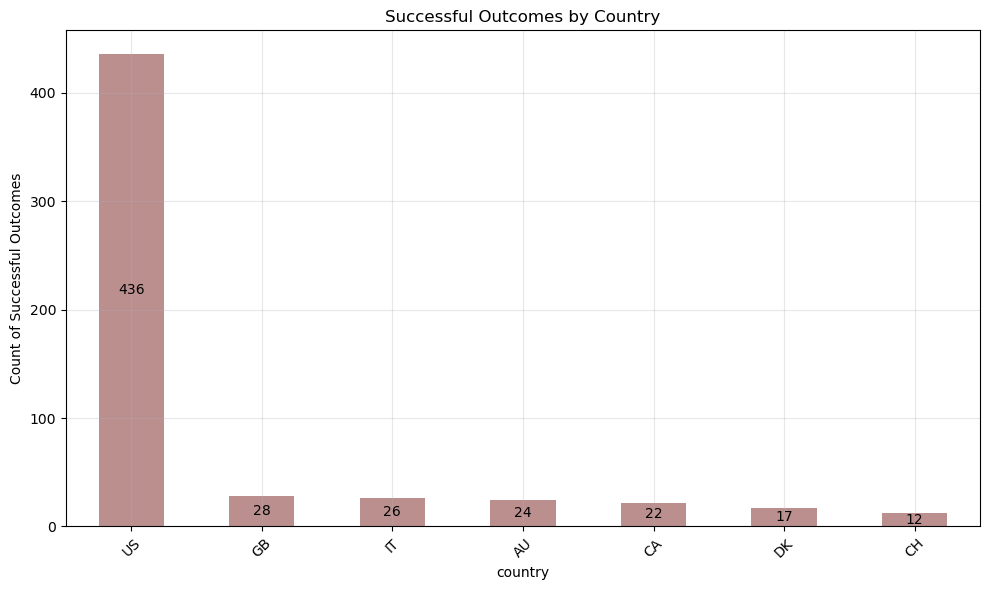

In [88]:
# Filter for successful outcomes
successful_outcomes = crowdfunding_info_df[crowdfunding_info_df['outcome'] == 'successful']
# Count successes per category
success_counts = successful_outcomes['country'].value_counts()

# Create a bar chart and assign it to ax
plt.figure(figsize=(10, 6))
ax = success_counts.plot(kind='bar', color='rosybrown')

# Add value labels on top of each section of the bars for values greater than zero
for container in ax.containers:
    ax.bar_label(container, label_type='center', labels=[f"{h:.0f}" if h > 0 else "" for h in container.datavalues])  # Place the label in the center of each section

plt.title('Successful Outcomes by Country')
plt.xlabel('country')
plt.ylabel('Count of Successful Outcomes')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Show the plot
plt.tight_layout()
plt.savefig("Resources/Successful_outcomes_by_country.png")
plt.show()